In [1]:
import pandas as pd
import numpy as np
#from google.colab import drive
from scipy.special import ndtri
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("mobile_data.csv")

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df["battery_power"].value_counts()

1589    6
618     6
1872    6
1379    5
1310    5
       ..
1072    1
1073    1
1074    1
1075    1
1998    1
Name: battery_power, Length: 1094, dtype: int64

In [5]:
df.shape

(2000, 21)

In [6]:
df=df.sort_values(by=['battery_power'],ascending=True).reset_index()

In [7]:
df

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,625,501,0,2.3,0,12,1,54,0.3,131,...,504,1089,2346,13,12,2,1,0,1,1
1,1115,501,1,0.5,1,14,0,22,0.5,174,...,239,1636,3077,17,3,17,0,0,0,2
2,1618,502,0,0.8,0,7,0,52,1.0,82,...,281,1159,2666,5,4,20,1,1,0,2
3,1027,502,0,1.5,1,7,0,37,0.2,199,...,705,1810,1649,6,1,14,0,1,0,1
4,736,503,0,2.5,0,3,0,57,0.6,185,...,778,1291,305,11,8,16,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,327,1995,1,0.5,0,6,0,26,0.2,129,...,649,1104,1322,15,11,7,0,1,1,1
1996,1682,1996,1,2.8,1,0,1,7,0.1,138,...,937,1083,1258,17,14,16,1,0,0,1
1997,753,1996,0,2.5,0,5,1,51,0.4,122,...,671,1445,2236,8,7,12,1,0,1,2
1998,309,1997,1,1.8,1,1,0,40,0.5,185,...,866,1212,1655,7,6,15,1,0,0,2


In [8]:
df["count"]=df.index+1

In [9]:
df.head()

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,count
0,625,501,0,2.3,0,12,1,54,0.3,131,...,1089,2346,13,12,2,1,0,1,1,1
1,1115,501,1,0.5,1,14,0,22,0.5,174,...,1636,3077,17,3,17,0,0,0,2,2
2,1618,502,0,0.8,0,7,0,52,1.0,82,...,1159,2666,5,4,20,1,1,0,2,3
3,1027,502,0,1.5,1,7,0,37,0.2,199,...,1810,1649,6,1,14,0,1,0,1,4
4,736,503,0,2.5,0,3,0,57,0.6,185,...,1291,305,11,8,16,0,0,1,0,5


In [10]:
n_rows=df.shape[0]

In [11]:
df["percentile_area"]=(df['count'])/n_rows

In [12]:
df["percentile_area"]

0       0.0005
1       0.0010
2       0.0015
3       0.0020
4       0.0025
         ...  
1995    0.9980
1996    0.9985
1997    0.9990
1998    0.9995
1999    1.0000
Name: percentile_area, Length: 2000, dtype: float64

In [13]:
df['z_theoritical']=ndtri(df["percentile_area"])

In [14]:
df['z_theoritical']

0      -3.290527
1      -3.090232
2      -2.967738
3      -2.878162
4      -2.807034
          ...   
1995    2.878162
1996    2.967738
1997    3.090232
1998    3.290527
1999         inf
Name: z_theoritical, Length: 2000, dtype: float64

In [15]:
df['z_actual']=(df["battery_power"]-df["battery_power"].mean())/df["battery_power"].std(ddof=0)

In [16]:
df['z_actual']

0      -1.678817
1      -1.678817
2      -1.676541
3      -1.676541
4      -1.674265
          ...   
1995    1.721983
1996    1.724259
1997    1.724259
1998    1.726536
1999    1.728812
Name: z_actual, Length: 2000, dtype: float64

In [17]:
df.head()

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,sc_w,talk_time,three_g,touch_screen,wifi,price_range,count,percentile_area,z_theoritical,z_actual
0,625,501,0,2.3,0,12,1,54,0.3,131,...,12,2,1,0,1,1,1,0.0005,-3.290527,-1.678817
1,1115,501,1,0.5,1,14,0,22,0.5,174,...,3,17,0,0,0,2,2,0.0010,-3.090232,-1.678817
2,1618,502,0,0.8,0,7,0,52,1.0,82,...,4,20,1,1,0,2,3,0.0015,-2.967738,-1.676541
3,1027,502,0,1.5,1,7,0,37,0.2,199,...,1,14,0,1,0,1,4,0.0020,-2.878162,-1.676541
4,736,503,0,2.5,0,3,0,57,0.6,185,...,8,16,0,0,1,0,5,0.0025,-2.807034,-1.674265


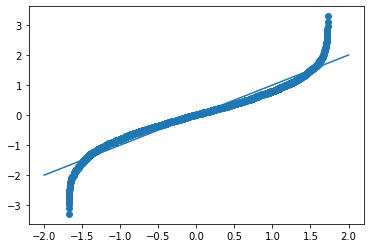

In [18]:
plt.scatter(df.z_actual,df.z_theoritical)
plt.plot([-2,-1,0,1,2],[-2,-1,0,1,2])